<a href="https://colab.research.google.com/github/sartoriando/dotfiles/blob/master/Rascunho_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time


Que dados quero obter?

Gênero na Câmara dos Deputados

Evolução no tempo
  - Desde quando? 1988
  - Descobrir que legislatura foi essa em df_legislaturas
  - em df_deputados, filtrar pela idLegislaturaInicial com dados acima

Perfil:
  - Idade
  - Estados - como obter isso, a UF pela qual foi eleita?
  - Partidos?

São autoras/co-autoras de quais projetos/ por temas?

Em que frentes parlamentares se conentram?

Presença na Mesa diretora
  Explicar importância disso


In [2]:
# Links das bases de dados
url_deputados = 'https://dadosabertos.camara.leg.br/arquivos/deputados/xlsx/deputados.xlsx'

# Formando o dataframe com os dados de todas as legislaturas (período para o qual o deputado é eleito)
url_legislaturas = 'https://dadosabertos.camara.leg.br/api/v2/legislaturas?itens=56&ordem=ASC&ordenarPor=id'
headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
re = requests.get(url_legislaturas, headers=headers)
re.json()
js = re.json()
# cria df a partir do json



In [106]:
#  Formando os Dataframes

# Formando o dataframe com os dados de todos os deputados
df_deputados = pd.read_excel(url_deputados)

# Base de dados das legislaturas
# df_legislaturas = pd.DataFrame(dic_legislaturas)
df_legislaturas = pd.json_normalize(js, 'dados')

#  Df com informações exclusivas das deputadas
m = df_deputados[df_deputados.siglaSexo == 'F']
mulheres = m[['nome','dataNascimento', 'idLegislaturaInicial', 'uri_deputado','nomeCivil', 'cpf', 'urlRedeSocial', 'urlWebsite', 'ufNascimento', 'municipioNascimento']]



In [112]:
# DF com totais de deputadas divididos por gênero por legislatura (em ano de início)

totais_por_sexo = df_deputados.groupby(['anoInicioLegislatura', 'siglaSexo']).count().reset_index()
totais_por_sexo.tail(5)


,anoInicioLegislatura,siglaSexo,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim
68,2011,M,243,243,243,243,243,0,46,14,243,6,240,239,243,243,243,243
69,2015,F,38,38,38,38,38,0,7,4,38,0,38,38,38,38,38,38
70,2015,M,212,212,212,212,212,0,32,7,212,2,212,212,212,212,212,212
71,2019,F,48,48,48,48,48,0,20,6,48,0,48,48,48,48,48,48
72,2019,M,225,225,225,225,225,0,91,12,225,2,224,225,225,225,225,225


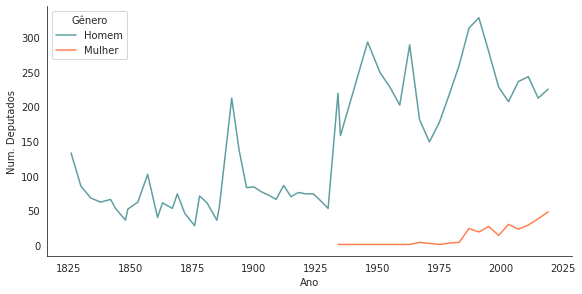

In [131]:
# Evolução da presença das mulheres na Câmara dos Deputados desde sua fundação

two_colors = {'F': '#FF7F50', 'M': '#5F9EA0'}

sns.set_style('white')
evolucao = sns.relplot(data=totais_por_sexo, kind='line', x='anoInicioLegislatura', 
                       y='uri_deputado', hue='siglaSexo', palette=two_colors, height=4, aspect=2, legend=False)
evolucao.set_axis_labels("Ano", "Num. Deputados")
plt.legend(title='Gênero', loc='upper left', labels=['Homem', 'Mulher'])
plt.show(evolucao)



In [132]:
# df_deputados.tail(2)
# df_deputados[df_deputados['nome'] == 'Rachel Marques'].uri.values

In [133]:
# Busca a legislatura da primeira mulher eleita para definir nova df
mulheres.idLegislaturaInicial.min()
# Df com dados de deputaods desde a 36a legislatura, quando foi eleita a primeira mulher. 
mulheres.idLegislaturaInicial.min()
#  Dados detalhados dos deputados na 55a Legislatura
df_deps_55 = df_deputados[df_deputados.idLegislaturaInicial == 55]
df_deps_55.head()

,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim,anoInicioLegislatura
6215,https://dadosabertos.camara.leg.br/api/v2/depu...,Norma Ayub,55,56,NORMA AYUB ALVES,NaN,F,NaN,NaN,1959-09-07,NaN,ES,Vitória,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6216,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,55,56,FAUSTO RUY PINATO,NaN,M,NaN,NaN,1977-06-01,NaN,SP,Fernandópolis,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6217,https://dadosabertos.camara.leg.br/api/v2/depu...,JÚLIA MARINHO,55,55,JULIA MARIA GODINHO DA CRUZ MARINHO,NaN,F,NaN,NaN,1960-04-11,NaN,GO,Itapirapuã,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6218,https://dadosabertos.camara.leg.br/api/v2/depu...,Bacelar,55,56,JOAO CARLOS BACELAR BATISTA,NaN,M,NaN,NaN,1957-07-09,NaN,BA,Esplanada,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6219,https://dadosabertos.camara.leg.br/api/v2/depu...,Felipe Carreras,55,56,FELIPE AUGUSTO LYRA CARRERAS,NaN,M,NaN,NaN,1975-04-16,NaN,PE,Recife,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015


In [137]:
df_teste = df_deputados[df_deputados.idLegislaturaInicial == 55]
df_teste.head()

,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim,anoInicioLegislatura
6215,https://dadosabertos.camara.leg.br/api/v2/depu...,Norma Ayub,55,56,NORMA AYUB ALVES,NaN,F,NaN,NaN,1959-09-07,NaN,ES,Vitória,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6216,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,55,56,FAUSTO RUY PINATO,NaN,M,NaN,NaN,1977-06-01,NaN,SP,Fernandópolis,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6217,https://dadosabertos.camara.leg.br/api/v2/depu...,JÚLIA MARINHO,55,55,JULIA MARIA GODINHO DA CRUZ MARINHO,NaN,F,NaN,NaN,1960-04-11,NaN,GO,Itapirapuã,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6218,https://dadosabertos.camara.leg.br/api/v2/depu...,Bacelar,55,56,JOAO CARLOS BACELAR BATISTA,NaN,M,NaN,NaN,1957-07-09,NaN,BA,Esplanada,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015
6219,https://dadosabertos.camara.leg.br/api/v2/depu...,Felipe Carreras,55,56,FELIPE AUGUSTO LYRA CARRERAS,NaN,M,NaN,NaN,1975-04-16,NaN,PE,Recife,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,2015


In [139]:
#  Criando df com dados pessoais dos deputados desde a 36a legislatura(quando foi eleita a 1a mulher)
# Criando um Dataframe vazio:
df_dados_pessoais = pd.DataFrame({'A' : []})

# Criando serie com os url dos dados pessoais de cada dep. Uri é a chave universal
# serie_uri = df_deps_reduzida.uri
serie_uri = df_deps_55.uri_deputado


In [31]:
# Scrapping na API da Câmara dos Deputados, abrindo o json de cada deputado para obter mais dados. 

for url in serie_uri:
  headers = {'content-type': 'application/json', 'Accept-Charset': 'UTF-8'}
  r = requests.get(url, headers=headers)
  r.json()
  j = r.json()
  # cria df a partir do json
  df = pd.json_normalize(j)
  df_dados_pessoais = df_dados_pessoais.append(df,ignore_index=True)
  time.sleep(0.5)
# df_dados_pessoais = pd.concat([df_dados_pessoais, df])

#  Renomeando colunas, retirando o dados e o id antes dos nomes.
for i in range(len(df_dados_pessoais.keys())):
  a = df_dados_pessoais.keys()[i]
  old = str(a)
  new = str(a.split('.')[-1])
  df_dados_pessoais.rename(columns={old:new}, inplace=True)

df_dados_pessoais.head()



,A,links,id,uri,nomeCivil,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email,data,nomeEleitoral,nome,predio,sala,andar,telefone,email,situacao,condicaoEleitoral,descricaoStatus,cpf,sexo,urlWebsite,redeSocial,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,escolaridade
0,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",66179.0,https://dadosabertos.camara.leg.br/api/v2/depu...,NORMA AYUB ALVES,66179.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Norma Ayub,DEM,https://dadosabertos.camara.leg.br/api/v2/part...,ES,56.0,https://www.camara.leg.br/internet/deputado/ba...,dep.normaayub@camara.leg.br,2019-02-01T11:45,Norma Ayub,732,4,732,7,3215-5732,dep.normaayub@camara.leg.br,Exercício,Titular,None,28008901187,F,None,[],1959-09-07,None,ES,Vitória,Superior
1,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",66828.0,https://dadosabertos.camara.leg.br/api/v2/depu...,FAUSTO RUY PINATO,66828.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,PP,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56.0,https://www.camara.leg.br/internet/deputado/ba...,dep.faustopinato@camara.leg.br,2019-02-01T11:45,Fausto Pinato,562,4,562,5,3215-5562,dep.faustopinato@camara.leg.br,Exercício,Titular,None,28022995819,M,None,[],1977-06-01,None,SP,Fernandópolis,Superior
2,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",67312.0,https://dadosabertos.camara.leg.br/api/v2/depu...,JULIA MARIA GODINHO DA CRUZ MARINHO,67312.0,https://dadosabertos.camara.leg.br/api/v2/depu...,JÚLIA MARINHO,PSC,https://dadosabertos.camara.leg.br/api/v2/part...,PA,55.0,https://www.camara.leg.br/internet/deputado/ba...,None,2019-01-31T23:59,JÚLIA MARINHO,None,None,None,None,None,None,Fim de Mandato,Titular,None,10799397253,F,None,[],1960-04-11,None,GO,Itapirapuã,Pós-Graduação
3,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",69871.0,https://dadosabertos.camara.leg.br/api/v2/depu...,JOAO CARLOS BACELAR BATISTA,69871.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Bacelar,PODE,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56.0,https://www.camara.leg.br/internet/deputado/ba...,dep.bacelar@camara.leg.br,2019-02-01T11:45,Bacelar,381,3,381,None,3215-5381,dep.bacelar@camara.leg.br,Exercício,Titular,None,10626409500,M,None,[],1957-07-09,None,BA,Esplanada,Mestrado
4,NaN,"[{'rel': 'self', 'href': 'https://dadosabertos...",72442.0,https://dadosabertos.camara.leg.br/api/v2/depu...,FELIPE AUGUSTO LYRA CARRERAS,72442.0,https://dadosabertos.camara.leg.br/api/v2/depu...,Felipe Carreras,PSB,https://dadosabertos.camara.leg.br/api/v2/part...,PE,56.0,https://www.camara.leg.br/internet/deputado/ba...,dep.felipecarreras@camara.leg.br,2019-02-01T11:45,Felipe Carreras,318,4,318,3,3215-5318,dep.felipecarreras@camara.leg.br,Exercício,Titular,None,86488023420,M,None,[],1975-04-16,None,PE,Recife,Superior Incompleto


In [32]:
# df_dados_pessoais para a 55a Legislatura
# Deputadas Titulares x suplentes

In [33]:
# df_dados_pessoais para a 55a Legislatura
# Nível de escolaridade: deputadas x deputados

In [34]:
# df_dados_pessoais para a 55a Legislatura
# Deputadas eleitas por UF

In [35]:
# Dataframe para cálculo das idades dos deputados no início da legislatura para a qual foram eleitos
df_idades = df_deputados.merge(df_legislaturas, left_on='idLegislaturaInicial', right_on='id')
df_idades.rename(columns={"uri_x": "uri_deputado", "uri_y": "uri_legislatura"}, inplace=True)


In [36]:
df_idades.head(5)

,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim
0,https://dadosabertos.camara.leg.br/api/v2/depu...,LOPES GAMA,1,2,Caetano Maria Lopes Gama,NaN,M,NaN,NaN,1795-08-05,1864-06-21,PE,Recife,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24
1,https://dadosabertos.camara.leg.br/api/v2/depu...,CARNEIRO,1,1,Francisco Carneiro de Campos,NaN,M,NaN,NaN,1776-01-01,1842-12-08,BA,Salvador,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24
2,https://dadosabertos.camara.leg.br/api/v2/depu...,CALMON,1,4,Miguel Calmon Du Pin e Almeida,NaN,M,NaN,NaN,1796-12-22,1865-10-05,BA,Santo Amaro,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24
3,https://dadosabertos.camara.leg.br/api/v2/depu...,SILVA LISBOA,1,1,José da Silva Lisboa,NaN,M,NaN,NaN,1756-07-16,1835-08-20,BA,Salvador,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24
4,https://dadosabertos.camara.leg.br/api/v2/depu...,INTENDENTE CÂMARA,1,1,Manoel Ferreira da Câmara Bittencourt Aguiar e Sá,NaN,M,NaN,NaN,1762-01-01,1835-12-13,MG,Itacambira,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24


In [60]:
# Calculando idades para todos os deputados e incluindo a coluna idadeNaPosse na df_idades. 

df_idades['idadeNaPosse'] = df_idades.apply(lambda row: int(row['dataInicio'].split('-')[0]) - int(row['dataNascimento'].split('-')[0]) if isinstance(row['dataNascimento'], str) else type(row['dataNascimento']), axis=1)

df_idades.head(17)



,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim,idadeNaPosse
0,https://dadosabertos.camara.leg.br/api/v2/depu...,LOPES GAMA,1,2,Caetano Maria Lopes Gama,NaN,M,NaN,NaN,1795-08-05,1864-06-21,PE,Recife,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,31
1,https://dadosabertos.camara.leg.br/api/v2/depu...,CARNEIRO,1,1,Francisco Carneiro de Campos,NaN,M,NaN,NaN,1776-01-01,1842-12-08,BA,Salvador,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,50
2,https://dadosabertos.camara.leg.br/api/v2/depu...,CALMON,1,4,Miguel Calmon Du Pin e Almeida,NaN,M,NaN,NaN,1796-12-22,1865-10-05,BA,Santo Amaro,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,30
3,https://dadosabertos.camara.leg.br/api/v2/depu...,SILVA LISBOA,1,1,José da Silva Lisboa,NaN,M,NaN,NaN,1756-07-16,1835-08-20,BA,Salvador,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,70
4,https://dadosabertos.camara.leg.br/api/v2/depu...,INTENDENTE CÂMARA,1,1,Manoel Ferreira da Câmara Bittencourt Aguiar e Sá,NaN,M,NaN,NaN,1762-01-01,1835-12-13,MG,Itacambira,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,64
5,https://dadosabertos.camara.leg.br/api/v2/depu...,MAIA,1,2,José Antônio da Silva Maia,NaN,M,NaN,NaN,1789-10-06,1853-10-03,NaN,NaN,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,37
6,https://dadosabertos.camara.leg.br/api/v2/depu...,MONTEIRO DE BARROS,1,1,Antonio Augusto Monteiro de Barros,NaN,M,NaN,NaN,1768-10-18,1841-11-16,MG,NaN,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,58
7,https://dadosabertos.camara.leg.br/api/v2/depu...,RIBEIRO DE REZENDE,1,7,Estevão Ribeiro Rezende,NaN,M,NaN,NaN,1777-07-20,1856-07-08,MG,NaN,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,49
8,https://dadosabertos.camara.leg.br/api/v2/depu...,VISCONDE DE CAETE,1,1,José Teixeira da Fonseca Vasconcelos,NaN,M,NaN,NaN,1766-10-18,1838-02-10,MG,NaN,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,60
9,https://dadosabertos.camara.leg.br/api/v2/depu...,ALMEIDA E ALBUQUERQUE,1,5,Manoel Caetano de Almeida e Albuquerque,NaN,M,NaN,NaN,1753-11-11,1844-10-14,PE,Recife,1,https://dadosabertos.camara.leg.br/api/v2/legi...,1826-04-29,1830-04-24,73


In [68]:
# Tabela específica para trabalhar com as idades na 55a legislatura

df_teste_idade = df_idades[df_idades.idLegislaturaInicial == 55]
df_teste_idade.head(5)


,uri_deputado,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,id,uri_legislatura,dataInicio,dataFim,idadeNaPosse
6215,https://dadosabertos.camara.leg.br/api/v2/depu...,Norma Ayub,55,56,NORMA AYUB ALVES,NaN,F,NaN,NaN,1959-09-07,NaN,ES,Vitória,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,56
6216,https://dadosabertos.camara.leg.br/api/v2/depu...,Fausto Pinato,55,56,FAUSTO RUY PINATO,NaN,M,NaN,NaN,1977-06-01,NaN,SP,Fernandópolis,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,38
6217,https://dadosabertos.camara.leg.br/api/v2/depu...,JÚLIA MARINHO,55,55,JULIA MARIA GODINHO DA CRUZ MARINHO,NaN,F,NaN,NaN,1960-04-11,NaN,GO,Itapirapuã,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,55
6218,https://dadosabertos.camara.leg.br/api/v2/depu...,Bacelar,55,56,JOAO CARLOS BACELAR BATISTA,NaN,M,NaN,NaN,1957-07-09,NaN,BA,Esplanada,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,58
6219,https://dadosabertos.camara.leg.br/api/v2/depu...,Felipe Carreras,55,56,FELIPE AUGUSTO LYRA CARRERAS,NaN,M,NaN,NaN,1975-04-16,NaN,PE,Recife,55,https://dadosabertos.camara.leg.br/api/v2/legi...,2015-02-01,2019-01-31,40


In [61]:
# Calculando medianas de idades por legislatura para homens e mulheres na 55a Legislatura
# Distribuição das idades das mulheres na 55 Legislatura

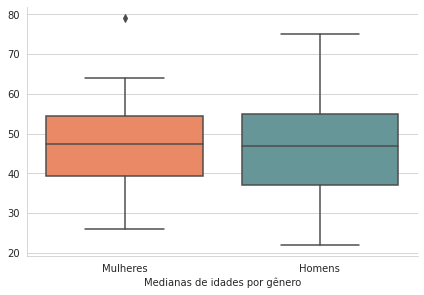

In [95]:
# Medianas das idades na 55a Legislatura (jan 2015 - jan 2019)
two_colors = {'F': '#FF7F50', 'M': '#5F9EA0'}
mediana_idades = sns.catplot(kind='box', data=df_teste_idade, x='siglaSexo', y='idadeNaPosse', height=4, aspect=1.5, palette=two_colors)
sns.despine()
mediana_idades.set(xticklabels=['Mulheres', 'Homens'])
mediana_idades.set_axis_labels('Medianas de idades por gênero', '')


TypeError: ignored

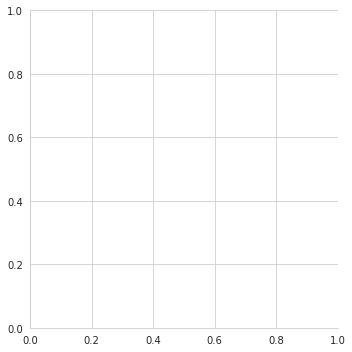

In [70]:
sns.catplot(kind='violin', data=df_teste_idade, x='siglaSexo', y='idadeNaPosse')

Ideias futuras:
#  Evolução nas medianas das mulheres no tempo, desde a 36a legislatura
